In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data


Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts


<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

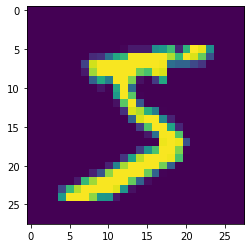

In [6]:
plt.imshow(train_digits[0])



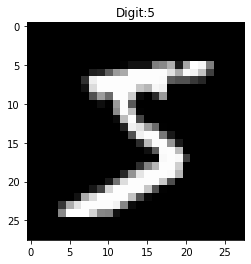

In [7]:

plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

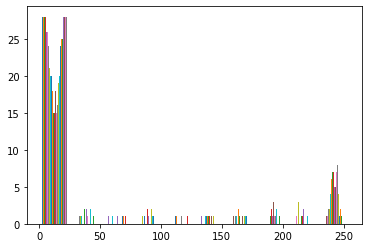

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([23034, 28757,  5609, 17129, 44270,  1915, 16852, 39144, 21324,
        8096, 51966, 31300, 21378,   232, 45048, 58307])

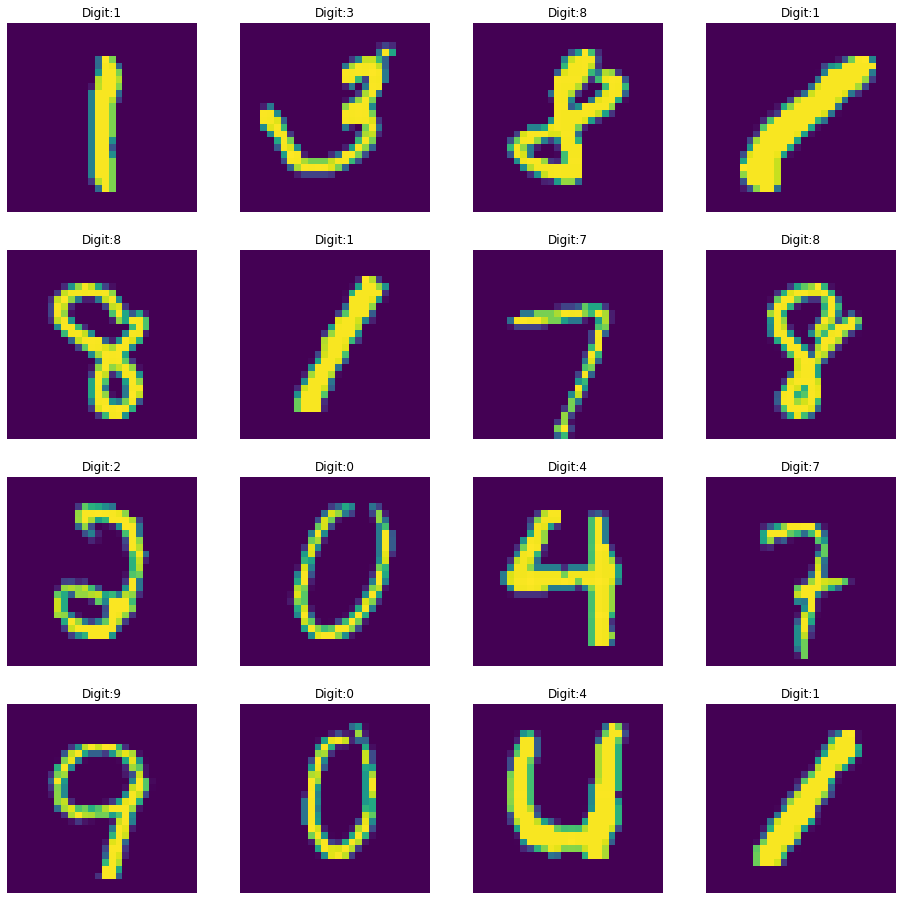

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical


In [13]:
train_labels_cat=to_categorical(train_labels)


In [14]:
test_labels_cat=to_categorical(test_labels)


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.2498 - accuracy: 0.9251 - val_loss: 0.1346 - val_accuracy: 0.9603
Epoch 2/5
54000/54000 [==============================] - 6s 107us/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 0.1300 - val_accuracy: 0.9638
Epoch 3/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0962 - val_accuracy: 0.9757
Epoch 4/5
54000/54000 [==============================] - 6s 107us/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.1126 - val_accuracy: 0.9690
Epoch 5/5
54000/54000 [==============================] - 6s 107us/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.1017 - val_accuracy: 0.9738


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)


10000/10000 [==============================] - 0s 29us/step


[0.09567311766514322, 0.9760000109672546]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))


array([[4.2766743e-10, 1.2415236e-06, 4.1961807e-06, 2.1360393e-06,
        1.2315570e-07, 1.0010288e-08, 5.9243777e-12, 9.9999082e-01,
        1.3370492e-07, 1.4418018e-06]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])


array([[4.27665792e-10, 1.24151768e-06, 4.19616435e-06, 2.13602902e-06,
        1.23155232e-07, 1.00102495e-08, 5.92435519e-12, 9.99990821e-01,
        1.33704404e-07, 1.44179626e-06],
       [1.63313034e-13, 1.89914595e-09, 9.99999881e-01, 1.07320581e-07,
        4.52955192e-13, 1.47463443e-12, 1.08712410e-12, 1.18422383e-09,
        4.28808065e-11, 4.83188801e-15],
       [5.46255023e-06, 9.98716116e-01, 2.73442365e-05, 3.50157097e-06,
        7.45459984e-05, 1.96522637e-06, 8.38643755e-05, 3.87638102e-06,
        1.08133908e-03, 1.99433589e-06],
       [9.99996305e-01, 2.62263455e-09, 3.29632911e-07, 9.75698633e-10,
        2.11016371e-07, 5.81669424e-09, 2.89688160e-06, 1.44836743e-09,
        1.49386054e-07, 1.22122600e-07],
       [1.15085356e-06, 4.01564976e-05, 3.83794941e-06, 8.70824550e-08,
        9.99620676e-01, 2.85747728e-06, 1.74367347e-06, 4.43106001e-06,
        3.31967954e-06, 3.21631349e-04],
       [1.50497002e-08, 9.99980688e-01, 1.20172828e-07, 1.38432155e-08,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))


array([[4.2766743e-10, 1.2415236e-06, 4.1961807e-06, 2.1360393e-06,
        1.2315570e-07, 1.0010288e-08, 5.9243777e-12, 9.9999082e-01,
        1.3370492e-07, 1.4418018e-06]], dtype=float32)

In [25]:
history.history


{'accuracy': [0.9251111, 0.9668148, 0.9757963, 0.9811852, 0.98314816],
 'loss': [0.24984154947184853,
  0.10956601900890194,
  0.07826815679521058,
  0.06300360080149646,
  0.051989109107827836],
 'val_accuracy': [0.9603333473205566,
  0.9638333320617676,
  0.9756666421890259,
  0.968999981880188,
  0.9738333225250244],
 'val_loss': [0.13456191272785267,
  0.12999997298667829,
  0.09617276184943815,
  0.11260989939142019,
  0.1016825050280119]}

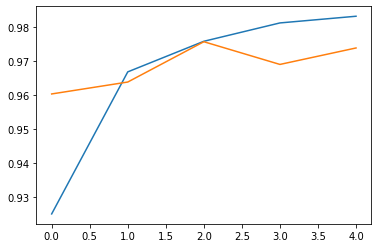

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 131us/step - loss: 0.2637 - accuracy: 0.9192 - val_loss: 0.1614 - val_accuracy: 0.9513
Epoch 2/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.1220 - val_accuracy: 0.9638
Epoch 3/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0990 - val_accuracy: 0.9707
Epoch 4/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.1085 - val_accuracy: 0.9723
Epoch 5/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.1024 - val_accuracy: 0.9745


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)


10000/10000 [==============================] - 0s 30us/step


[0.09308926714263507, 0.9743000268936157]

In [31]:

print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))


array([[4.2766743e-10, 1.2415236e-06, 4.1961807e-06, 2.1360393e-06,
        1.2315570e-07, 1.0010288e-08, 5.9243777e-12, 9.9999082e-01,
        1.3370492e-07, 1.4418018e-06]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])


array([[4.27665792e-10, 1.24151768e-06, 4.19616435e-06, 2.13602902e-06,
        1.23155232e-07, 1.00102495e-08, 5.92435519e-12, 9.99990821e-01,
        1.33704404e-07, 1.44179626e-06],
       [1.63313034e-13, 1.89914595e-09, 9.99999881e-01, 1.07320581e-07,
        4.52955192e-13, 1.47463443e-12, 1.08712410e-12, 1.18422383e-09,
        4.28808065e-11, 4.83188801e-15],
       [5.46255023e-06, 9.98716116e-01, 2.73442365e-05, 3.50157097e-06,
        7.45459984e-05, 1.96522637e-06, 8.38643755e-05, 3.87638102e-06,
        1.08133908e-03, 1.99433589e-06],
       [9.99996305e-01, 2.62263455e-09, 3.29632911e-07, 9.75698633e-10,
        2.11016371e-07, 5.81669424e-09, 2.89688160e-06, 1.44836743e-09,
        1.49386054e-07, 1.22122600e-07],
       [1.15085356e-06, 4.01564976e-05, 3.83794941e-06, 8.70824550e-08,
        9.99620676e-01, 2.85747728e-06, 1.74367347e-06, 4.43106001e-06,
        3.31967954e-06, 3.21631349e-04],
       [1.50497002e-08, 9.99980688e-01, 1.20172828e-07, 1.38432155e-08,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))


array([[4.2766743e-10, 1.2415236e-06, 4.1961807e-06, 2.1360393e-06,
        1.2315570e-07, 1.0010288e-08, 5.9243777e-12, 9.9999082e-01,
        1.3370492e-07, 1.4418018e-06]], dtype=float32)

In [36]:
history.history


{'accuracy': [0.9191667, 0.96562964, 0.9748333, 0.9799815, 0.98351854],
 'loss': [0.26366210459007156,
  0.11187740265784991,
  0.08118495917734173,
  0.06378508116834349,
  0.053303225342287784],
 'val_accuracy': [0.9513333439826965,
  0.9638333320617676,
  0.9706666469573975,
  0.9723333120346069,
  0.9745000004768372],
 'val_loss': [0.16142859429121018,
  0.12203961837291717,
  0.0989866991142432,
  0.10848800011755277,
  0.10238260939142978]}

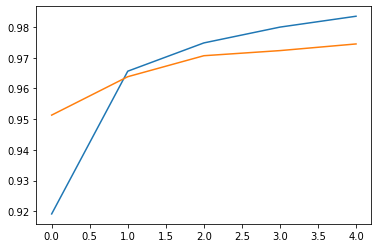

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])